# Laboratorio 4. Clustering: Segmentación de Clientes Basada en Comportamiento de Compra

In [94]:
# Importar librerías Generales
import scipy.stats as stats # type: ignore
import numpy as np # type: ignore
import statsmodels.api as sm # type: ignore
import seaborn as sns # type: ignore
import pandas as pd # type: ignore
from matplotlib import pyplot as plt # type: ignore
import locale # type: ignore
from scipy.stats import anderson # type: ignore
import statsmodels.api as sm # type: ignore
from ydata_profiling import ProfileReport # type: ignore

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [95]:
locale.setlocale( locale.LC_ALL, '' )

# Lectura de datos
df = pd.read_csv('shopping_behavior_updated.csv')

## 2. Análisis Exploratorio

In [96]:
# Visualizar las primeras filas del conjunto de datos para entender su estructura.
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [128]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\DIEAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index(name=duplicates_key)
c:\Users\DIEAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index(name=duplicates_key)
c:\Users\DIEAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [98]:
# Realizar estadísticas descriptivas para comprender las distribuciones y rangos de las variables.
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


| Variable Name         | Variable Type         |
|-----------------------|-----------------------|
| Age                   | Cuantitativa Discreta |
| Gender                | Cualitativa Nominal   |
| Item Purchased        | Cualitativa Nominal   |
| Category              | Cualitativa Nominal   |
| Purchased Amount      | Cuantitativa Continua |
| Location              | Cualitativa Nominal   |
| Size                  | Cualitativa Nominal   |
| Color                 | Cualitativa Nominal   |
| Season                | Cualitativa Nominal   |
| Review Rating         | Cuantitativa Discreta |
| Subscription Status   | Cualitativa Nominal   |
| Shipping Type         | Cualitativa Nominal   |
| Discount Applied      | Cualitativa Nominal   |
| Promo Code Used       | Cualitativa Nominal   |
| Previous Purchases    | Cuantitativa Discreta   |
| Payment Method        | Cualitativa Nominal   |
| Frequency of Purchases| Cualitativa Nominal   |

Variables que no se usarán: customer id

Todas las variables con la denominación `cualitativa nominal` se tratarán como variables categóricas. 

In [99]:
#    - Identificar y manejar valores faltantes si los hay. 
'No hay valores faltantes' 

'No hay valores faltantes'

In [100]:
# - Graficar distribuciones y relaciones entre variables importantes.
'Del profiler?'

'Del profiler?'

## 3. Preprocesamiento de Datos

### Limpieza de Datos
- Manejar valores faltantes, ya sea eliminándolos o imputándolos.
- Codificar variables categóricas utilizando técnicas como One-Hot Encoding.


In [101]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [102]:
# Eliminar customer id. 
df = df.drop(columns=['Customer ID'])
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [103]:
# para cada columna, tipo de dato. 
df.dtypes

Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [104]:
# para todos los datos tipo object, usar one hot encoding.
df = pd.get_dummies(df)
df.columns

Index(['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases',
       'Gender_Female', 'Gender_Male', 'Item Purchased_Backpack',
       'Item Purchased_Belt', 'Item Purchased_Blouse', 'Item Purchased_Boots',
       ...
       'Payment Method_Debit Card', 'Payment Method_PayPal',
       'Payment Method_Venmo', 'Frequency of Purchases_Annually',
       'Frequency of Purchases_Bi-Weekly',
       'Frequency of Purchases_Every 3 Months',
       'Frequency of Purchases_Fortnightly', 'Frequency of Purchases_Monthly',
       'Frequency of Purchases_Quarterly', 'Frequency of Purchases_Weekly'],
      dtype='object', length=143)

In [105]:
# para todos los nombres de columna:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
df.columns = df.columns.str.replace('-', '')

# convertir a minusculas
df.columns = df.columns.str.lower()

In [106]:
df.columns

Index(['age', 'purchase_amount_usd', 'review_rating', 'previous_purchases',
       'gender_female', 'gender_male', 'item_purchased_backpack',
       'item_purchased_belt', 'item_purchased_blouse', 'item_purchased_boots',
       ...
       'payment_method_debit_card', 'payment_method_paypal',
       'payment_method_venmo', 'frequency_of_purchases_annually',
       'frequency_of_purchases_biweekly',
       'frequency_of_purchases_every_3_months',
       'frequency_of_purchases_fortnightly', 'frequency_of_purchases_monthly',
       'frequency_of_purchases_quarterly', 'frequency_of_purchases_weekly'],
      dtype='object', length=143)

Las columnas han sido pre procesadas, las variables categóricas han sido tratadas usando one hot encoding, todos los nombres de variables siguen el mismo formato y están en minúscula. 

### 2.  Normalización de Datos:
- Aplicar normalización o estandarización a las características numéricas para garantizar que todas están en la misma escala.


In [107]:
# para las columnas: 'age', 'purchase_amount_usd', 'review_rating', 'previous_purchases'. Aplicar normalización o estandarización.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['age', 'purchase_amount_usd', 'review_rating', 'previous_purchases']] = scaler.fit_transform(df[['age', 'purchase_amount_usd', 'review_rating', 'previous_purchases']])
df.head()

,age,purchase_amount_usd,review_rating,previous_purchases,gender_female,gender_male,item_purchased_backpack,item_purchased_belt,item_purchased_blouse,item_purchased_boots,...,payment_method_debit_card,payment_method_paypal,payment_method_venmo,frequency_of_purchases_annually,frequency_of_purchases_biweekly,frequency_of_purchases_every_3_months,frequency_of_purchases_fortnightly,frequency_of_purchases_monthly,frequency_of_purchases_quarterly,frequency_of_purchases_weekly
0,0.711538,0.4125,0.24,0.265306,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
1,0.019231,0.5500,0.24,0.020408,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0.615385,0.6625,0.24,0.448980,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.057692,0.8750,0.40,0.979592,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,0.519231,0.3625,0.08,0.612245,False,True,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False


Se aplicó estandarización, con valores entre 0 y 1 para las variables cuantitativas. 

## Parte 3 - Clustering con K-Means

### 1.  Aplicación Inicial de K-Means:
- Aplicar el algoritmo K-Means con un número arbitrario de clústeres (por ejemplo, 3) para tener una primera vista.

In [108]:
from sklearn.cluster import KMeans

In [109]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
kmeans.fit(df)

KMeans(n_clusters=2, random_state=0)

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

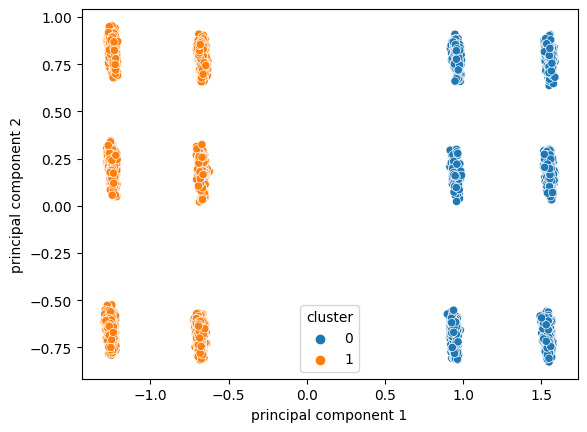

In [110]:
# visualizar los clusters (ploteo) usando PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf['cluster'] = kmeans.labels_

sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='cluster')

Podemos observar que no existe una buena separación de los clusters. 

In [111]:
# evaluar usando método de silhouette
from sklearn.metrics import silhouette_score

silhouette_score(df, kmeans.labels_)

0.13132960707571265

Ya que el valor puede estar entre 0 y 1, y el valor obtenido no está ni cerca de uno, podemos concluir de que no estamos usando un k adecuado. 

### 2.  Búsqueda del Número Óptimo de Clústeres:
   - Utilizar el método del codo para identificar el número óptimo de clústeres.
   - Aplicar la métrica de la silueta como confirmación adicional.

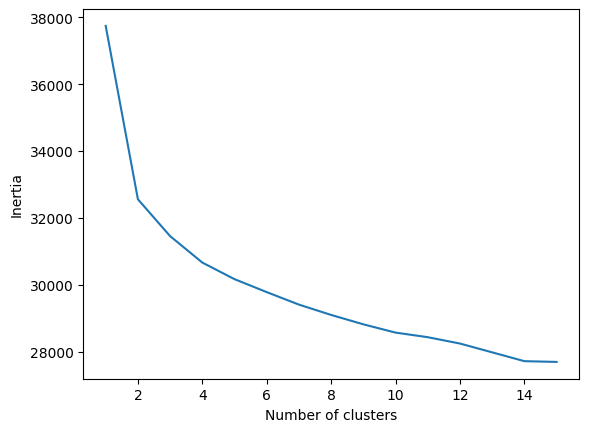

El número óptimo de clusters es 14


In [112]:
# usar método de elbow para determinar el número de clusters

inertia = []
rate_of_change = []
max_clusters = 15
for k in range (1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    inertia.append(kmeans.inertia_)
    
# calcular la tasa de cambio
for i in range(1, len(inertia)):
    rate_of_change.append(inertia[i-1] - inertia[i])

# buscar el punto óptimo
optimal_k = np.argmin(rate_of_change) + 1

plt.plot(range(1, max_clusters+1), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

optimal_k
print(f"El número óptimo de clusters es {optimal_k}")

In [113]:
# reentrenar el modelo con el número óptimo de clusters
kmeans = KMeans(n_clusters=14, random_state=0).fit(df)
kmeans.fit(df)

# silueta
silhouette_score(df, kmeans.labels_)

0.049589225704974836

Para 2 clusters, el score es 0.13132960707571265
Para 3 clusters, el score es 0.08028885974455716
Para 4 clusters, el score es 0.0586958180262438
Para 5 clusters, el score es 0.04963455468765613
Para 6 clusters, el score es 0.04737154826695328
Para 7 clusters, el score es 0.044077099462749104
Para 8 clusters, el score es 0.04805098735120356
Para 9 clusters, el score es 0.04534156613385827
Para 10 clusters, el score es 0.0422156465623076
Para 11 clusters, el score es 0.041265559370977964
Para 12 clusters, el score es 0.039596059257901224
Para 13 clusters, el score es 0.0422256269142344
Para 14 clusters, el score es 0.049589225704974836
Para 15 clusters, el score es 0.0419928893261999
Para 16 clusters, el score es 0.04642154088954644
Para 17 clusters, el score es 0.0437004016377428
Para 18 clusters, el score es 0.04115844063887298
Para 19 clusters, el score es 0.0422543974124798


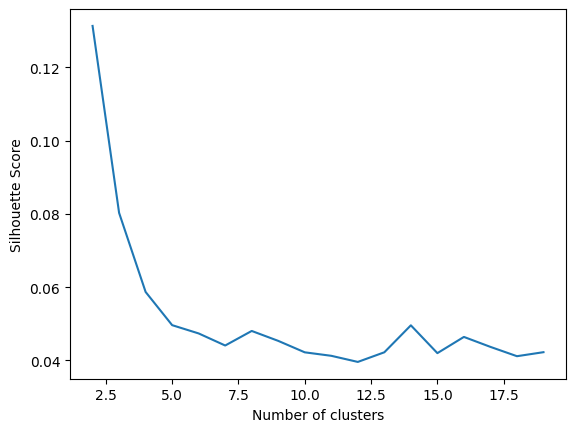

In [114]:
# repetir los pasos arriba. 
scores = []
range_max = 20

for i in range (2, range_max):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    scores.append(score)


for k, score in enumerate(scores, start=2):
    print(f"Para {k} clusters, el score es {score}")

# visualizar k, score. 
plt.plot(range(2, range_max), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Se concluye que, aunque el método de codo arroja que 14 es el mejor número para k, no resulta en un mejor puntaje usando el método de silueta. Por esto, se usará k=2, para buscar el mejor resultado posible en el método de silueta. 

In [121]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
kmeans.fit(df)

KMeans(n_clusters=2, random_state=0)

## Parte 4: Análisis de Clústeres

### 1. Interpretación de Clústeres:
- Analizar las características promedio de cada clúster para entender los segmentos de clientes.
- Visualizar los clústeres utilizando técnicas de reducción de dimensionalidad, si es posible

<Axes: xlabel='cluster'>

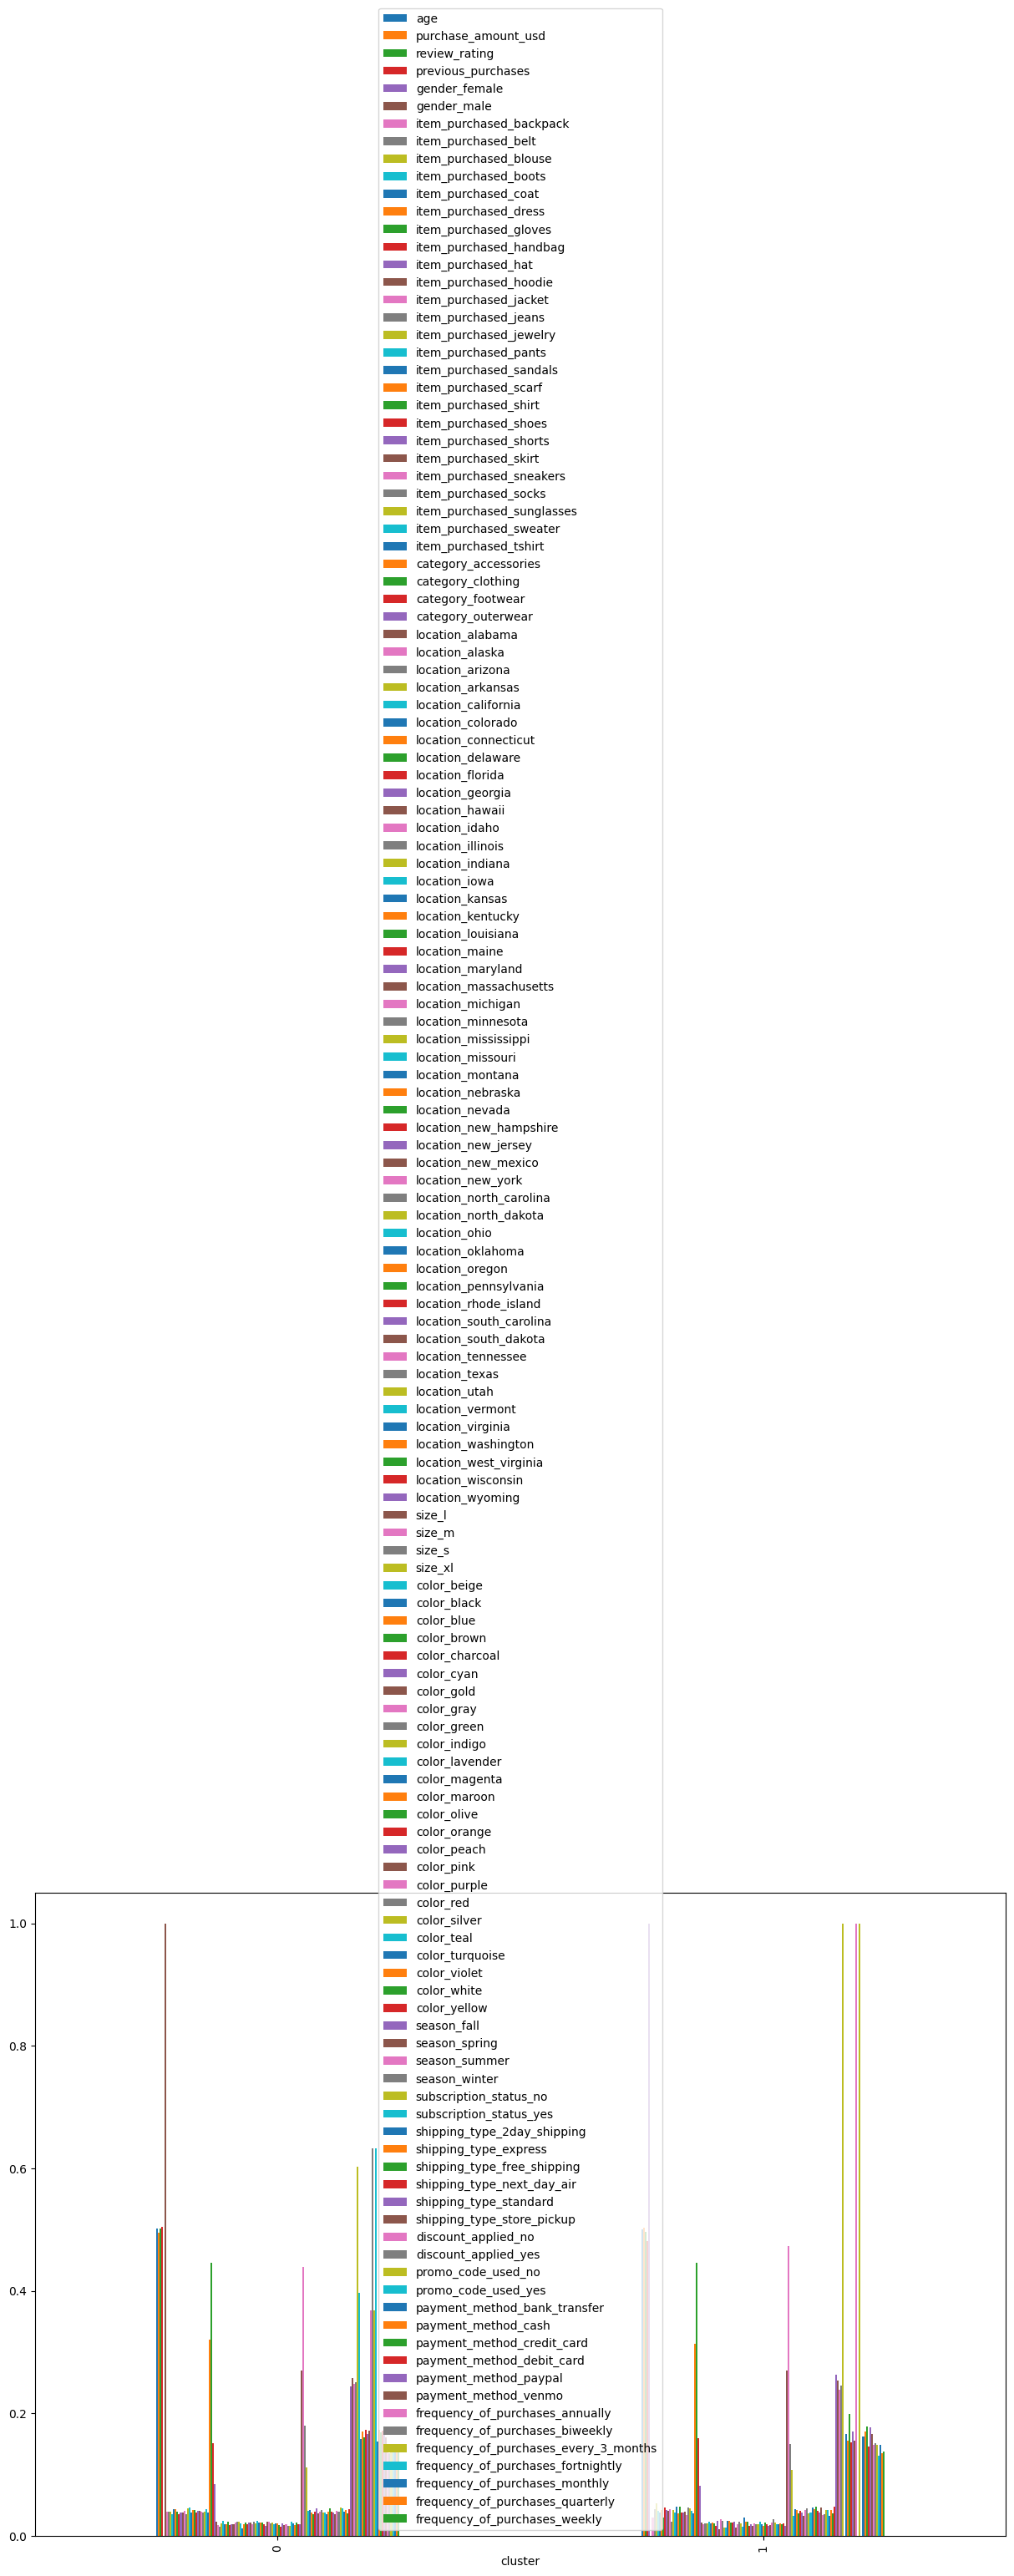

In [122]:
# Analizar las características promedio de cada clúster para entender los segmentos de clientes.
df['cluster'] = kmeans.labels_
df.groupby('cluster').mean()

# Visualizar las características promedio de cada clúster.
df.groupby('cluster').mean().plot(kind='bar', figsize=(15, 10))

In [137]:
# Imprimir en un txt
df.groupby('cluster').mean().to_csv('cluster_means.csv')

In [142]:
import pandas as pd

# Dividir los datos en dos DataFrames, uno por cada clúster
cluster0 = df[df['cluster']==0]
cluster1 = df[df['cluster']==1]

# Crear un nuevo DataFrame con los promedios de cada variable por clúster
cluster_means = pd.DataFrame({'Cluster 0': cluster0.mean(), 'Cluster 1': cluster1.mean()})

# Calcular la diferencia absoluta entre promedios
cluster_diffs = cluster_means.iloc[:,0] - cluster_means.iloc[:,1]
cluster_diffs = cluster_diffs.abs()

# Ordenar de mayor a menor diferencia
sorted_diffs = cluster_diffs.sort_values(ascending=False)

print("Variables con mayores diferencias entre clústeres:")
for var, diff in sorted_diffs.head(14).items():
    cluster_with_higher_value = 'Cluster 0' if cluster_means.loc[var, 'Cluster 0'] > cluster_means.loc[var, 'Cluster 1'] else 'Cluster 1'
    print(f"{var}: {diff:.4f} (Valor mayor en {cluster_with_higher_value})")

Variables con mayores diferencias entre clústeres:
cluster: 1.0000 (Valor mayor en Cluster 1)
gender_female: 1.0000 (Valor mayor en Cluster 1)
gender_male: 1.0000 (Valor mayor en Cluster 0)
discount_applied_no: 0.6324 (Valor mayor en Cluster 1)
promo_code_used_no: 0.6324 (Valor mayor en Cluster 1)
discount_applied_yes: 0.6324 (Valor mayor en Cluster 0)
promo_code_used_yes: 0.6324 (Valor mayor en Cluster 0)
subscription_status_no: 0.3971 (Valor mayor en Cluster 1)
subscription_status_yes: 0.3971 (Valor mayor en Cluster 0)
shipping_type_free_shipping: 0.0389 (Valor mayor en Cluster 1)
size_m: 0.0335 (Valor mayor en Cluster 1)
size_s: 0.0296 (Valor mayor en Cluster 0)
payment_method_debit_card: 0.0265 (Valor mayor en Cluster 0)
previous_purchases: 0.0227 (Valor mayor en Cluster 0)


### Estrategias de Marketing y Recomendaciones para Cluster 0:

- **Género Masculino Dominante:** Dado que el género masculino predomina en este clúster, las estrategias de marketing podrían estar dirigidas específicamente a este grupo demográfico. Esto puede incluir campañas publicitarias, promociones o productos diseñados para hombres.

- **Mayor Utilización de Descuentos y Códigos de Promoción:** Dado que este clúster muestra una mayor tendencia a usar descuentos y códigos de promoción, las estrategias de marketing podrían enfocarse en ofrecer ofertas especiales y promociones exclusivas para este segmento.

- **Mayor Tasa de Suscripción:** Este clúster muestra una mayor propensión a tener una suscripción activa. Por lo tanto, podría ser beneficioso ofrecer incentivos adicionales para mantener y aumentar la base de suscriptores en este grupo.

- **Preferencia por Métodos de Pago como Tarjeta de Débito:** Dado que este clúster muestra una preferencia por el pago con tarjeta de débito, podría ser útil ofrecer opciones de pago que se alineen con las preferencias de este segmento.

### Estrategias de Marketing y Recomendaciones para Cluster 1:

- **Género Femenino Dominante:** Dado que el género femenino predomina en este clúster, las estrategias de marketing podrían estar dirigidas específicamente a las mujeres. Esto puede incluir productos, campañas publicitarias o promociones diseñadas para satisfacer las necesidades y preferencias de este grupo demográfico.

- **Menor Utilización de Descuentos y Códigos de Promoción:** Aunque hay una menor propensión a usar descuentos y códigos de promoción en este clúster, podrían considerarse estrategias para incentivar la participación en estas ofertas, como ofertas personalizadas o programas de recompensas.

- **Tendencia hacia Envío Gratuito:** Dado que este clúster muestra una preferencia por el envío gratuito, podría ser beneficioso ofrecer políticas de envío flexibles o promociones especiales relacionadas con el envío gratuito para atraer y retener a estos clientes.

- **Tamaño de Producto:** Se observa una preferencia por tamaños de producto como "M". Esto podría influir en las recomendaciones de productos y la disponibilidad de inventario para este segmento en particular.

### Parte 5: Reflexión y Conclusión

#### Reflexión sobre los Resultados:

El análisis de clústeres ha proporcionado insights valiosos sobre el comportamiento de compra de los clientes. Al identificar segmentos de clientes con características y comportamientos similares, podemos diseñar estrategias de marketing más efectivas y personalizadas. En este caso, hemos identificado dos segmentos distintos, cada uno con sus propias preferencias y tendencias de compra, mencionadas anteriormente.

#### Limitaciones del Análisis y Posibles Mejoras:

Una de las limitaciones es la elección del algoritmo de clustering y el número de clústeres. En este análisis, utilizamos el algoritmo K-Means y exploramos diferentes valores para el número de clústeres. Sin embargo, otros algoritmos de clustering y técnicas de selección de clústeres podrían proporcionar resultados diferentes.

Otra limitación es la calidad y cantidad de datos disponibles. En este caso, hemos trabajado con un conjunto de datos específico sobre el comportamiento de compra, pero la calidad de los datos y la disponibilidad de variables relevantes pueden influir en la efectividad del análisis de clústeres. Además, la interpretación de los clústeres requiere un conocimiento profundo del dominio del negocio y puede estar sujeta a sesgos o interpretaciones erróneas.

Para mejorar el análisis de clústeres, podríamos considerar la inclusión de más variables relevantes, la exploración de diferentes algoritmos de clustering y técnicas de selección de clústeres, así como la validación de los resultados utilizando datos adicionales o pruebas de hipótesis. Además, la colaboración de expertos en marketing y profesionales del negocio puede enriquecer el análisis y garantizar una aplicación efectiva de los resultados en la práctica empresarial.